<a href="https://colab.research.google.com/github/sahroush/AI-Spring2024/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Explaining the mathematical intuition behind some optimizers



## **A: Stochastic Gradient Descent + Momentum**

Imagine you're on a hiking trail, trying to find the quickest path down a steep and rocky mountain to reach the valley below. Your goal is to descend as rapidly as possible while avoiding getting stuck in any valleys or climbing unnecessary hills.

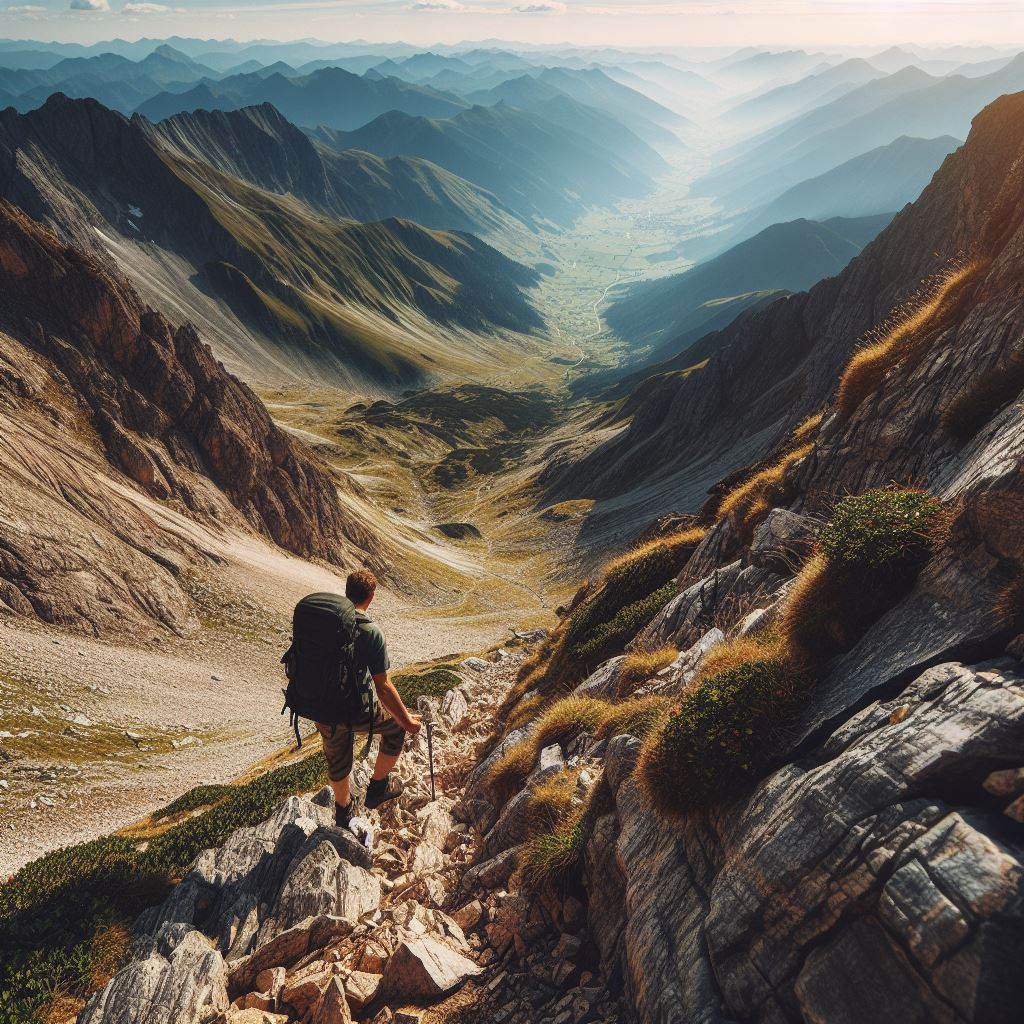



Source: Bing AI

Imagine your vision is very poor. You can only decide on your next step (and not the steps following it) after carefully considering your surroundings. Here are a couple of strategies you might use:

1. **Analyzing the Entire Surrounding**: This is like when you study the slope of the mountain from every angle you can perceive. You calculate the exact direction you should step in to make the most progress towards the valley below. While this method is very precise, it's also time-consuming and requires a lot of effort. This is similar to how Vanilla Gradient Descent works.

2. **Glimpsing at a Nearby Sight**: In this approach, you don't have the luxury of examining the entire landscape. Instead, you take one quick glance at a nearby sight and then decide on your next step based on your observation. While this method might not always lead you in the best direction, it gets you down the mountain gradually over time. This is akin to how Stochastic Gradient Descent operates.

2. **Glimpsing at Nearby Sights**: This approach is quite similar to the previous method. You take quick glances at a few nearby sights and then decide on your next step based on these limited observations. This method is less chaotic than observing a single sight but still doesn't give you the optimal direction. This is how Mini-batch Gradient Descent works.

Now let's gain some intuition into how these different variations of GD behave:

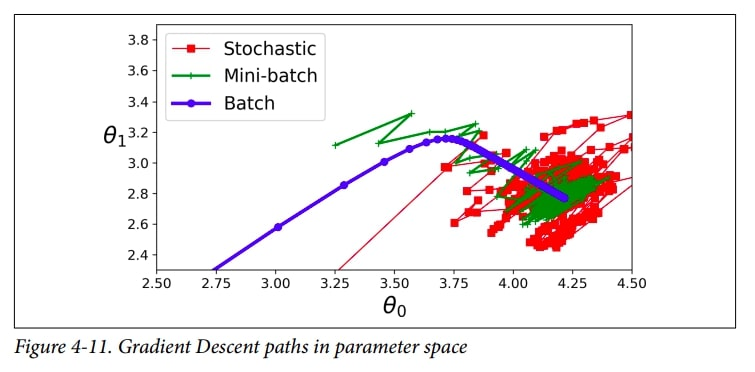

Source: hands-on machine learning with scikit-learn keras and tensorflow - aurélien géron

- **Vanilla:**  Since Vanilla Gradient Descent considers the entire dataset (scenery) for each update (step) , its convergence path tends to be smoother compared to Stochastic Gradient Descent. Note that this process is computationally expensive since it considers the entire dataset for each update.

- **Stochastic:** Stochastic Gradient Descent tends to exhibit more chaotic behavior during optimization due to its noisy updates. It can oscillate around the minimum and may struggle to converge to an optimal solution. This method is much faster than vanilla because it uses a single data point.

- **Mini-Batch:**  Mini-Batch Gradient Descent exhibits less chaotic behavior compared to Stochastic Gradient Descent since it processes mini-batches of data, providing a more stable update direction. Thus this method could be said to offer a balance between speed and stability.

**Note:** All these methods use the same update rule:

$\theta_{t+1} = \theta_t - \eta \cdot \nabla J_i(\theta_t)$

where:
- $\theta_{t+1}$ is the updated model parameters at time step $t+1$,
- $\theta_t$ is the current model parameters at time step $t$,
- $\eta$ is the learning rate, controlling the size of the update step, and
- $\nabla J(\theta_t)$ is the gradient of the loss function.

So we are just moving our parameters in the opposite direction of the gradient.

They only differ in $\nabla J_i(\theta_t)$:

- In **Vanilla** GD: $\nabla J(\theta_t)$ is the gradient with respect to the parameters for the all the data points.
- In **Stochastic** GD: $\nabla J(\theta_t)$ is the gradient with respect to the parameters for the randomly selected data point.
- In **Mini-Batch** GD: $\nabla J(\theta_t)$ is the gradient with respect to the parameters for the randomly selected batch of data points.

After having seen some variations of gradient descent, let us continue our journey down the mountain.

1. **Starting the Descent**:
   You begin your descent from the mountaintop. Initially, you have no momentum, so you take cautious steps downward, following the slope directly below your feet. This is similar to the traditional Gradient Descent (GD) method, where you update your position based solely on the current slope.

2. **Gaining Momentum**:
   As you descend, you start to pick up speed. With each step, you remember your recent momentum and the direction you've been moving. If the slope ahead of you is steep and pointing in the same direction as your recent movement, you accelerate, trusting that your momentum will carry you through rough patches. This is the addition of momentum to GD. You start to rely not only on the current slope but also on your recent movement history to guide your descent.

3. **Navigating the Terrain**:
   However, you encounter a challenge: the terrain becomes erratic. There are sudden drops, jagged rocks, and unexpected turns. Without momentum, you'd have to slow down considerably to carefully navigate each obstacle. But with momentum, you're able to glide over these rough patches, maintaining a relatively steady pace. This smoothness comes from your momentum, which helps dampen the effects of sudden changes in the terrain.

4. **Reaching the Valley**:
   As you approach the valley floor, the terrain levels out, and your momentum begins to wane. You're no longer accelerating as you were on the steep slopes. Eventually, you come to a gentle stop at the valley bottom, having descended the mountain much faster than if you had relied solely on the current slope at each step.

This story gives us some useful insights into the momentum optimization:

- Using Gradient Descent with no optimizations, our "steps" solely depended on the gradient of the loss function at our current point. We preserved no extra information from our previous steps and thus had more chance to take chaotic steps.

- Not having momentum meant we could get stuck in parts with small slopes (the vanishing gradient problem).

Thus we can List the advantages of the momentum optimization as follows:

1. **Accelerated Convergence**: Momentum helps accelerate the convergence of the optimization process by accumulating gradient information over time. Instead of relying solely on the current gradient to update the parameters, momentum incorporates information from past gradients, allowing for smoother and more continuous updates.

2. **Damped Oscillations**: By incorporating momentum, the optimizer tends to dampen oscillations during optimization. This is particularly beneficial in scenarios where the loss landscape is rugged or contains sharp valleys and ridges. The accumulated momentum helps the optimizer move past small local minima and continue towards the global minimum.

3. **Improved Generalization**: Momentum optimization often leads to models that generalize better to unseen data. This is because the momentum helps the optimizer explore the solution space more effectively, leading to solutions that are less sensitive to noise in the training data and are more likely to capture the underlying patterns of the data.

4. **Efficient Optimization**: Momentum optimization requires fewer iterations to converge compared to traditional optimization methods like Vanilla Gradient Descent. This efficiency is particularly advantageous in training deep neural networks on large datasets, where each iteration can be computationally expensive.




**Mathematical Formulation:**

We've seen how the momentum optimization preserves information from previous iterations and how gradients basically affect our "speed" instead of directly changing our position. Thus we could easily come up with an update rule:


$v_{t+1} = \gamma v_t + \eta \cdot \nabla J(\theta_t)$

$\theta_{t+1} = \theta_t - v_{t+1}$

where:
- $v_t$ is the velocity at time step $t$, which accumulates the gradients over time,
- $\gamma$ is the momentum parameter, controlling the impact of the accumulated velocity on the update,
- $\eta$ is the learning rate, controlling the size of the update step (on the momentum),
- $\nabla J(\theta_t)$ is the gradient of the loss function with respect to the parameters at time step $t$, and
- $\theta_t$ is the current model parameters at time step $t$.



**Comparison:**
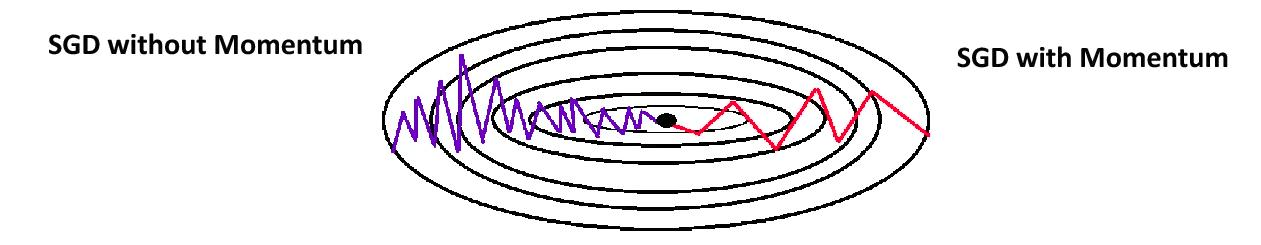

Source: Nature

The **dampening** and **acceleration** effects of using the momentum optimization can clearly be seen in this image.

![gif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*zVi4ayX9u0MQQwa90CnxVg.gif)\
Source: TowardsDataScience


*Momentum (magenta) vs. Gradient Descent (cyan) on a surface with a global minimum (the left well) and local minimum (the right well)*

## **B: AdaGrad**

So we learned that descending down the mountain and reaching the bottom of the valley is essentially the same as slowly moving on the loss function and reaching the minimum value.

Let's see what would happen if our loss function looked like an elongated bowl (this happens when the features don't have the same scale, i.e. the mountain has much greater width than it's length):

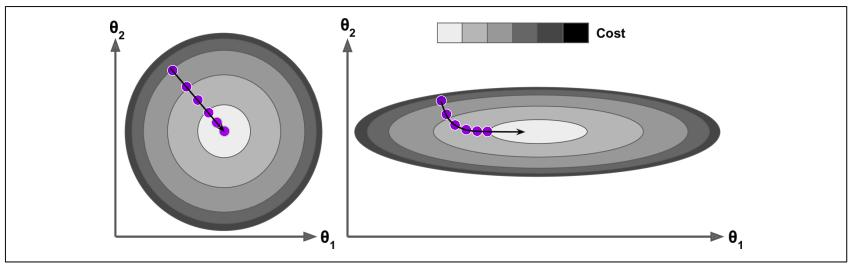

Source: hands-on machine learning with scikit-learn keras and tensorflow - aurélien géron
<br/>
<br>
As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, reaching it quickly.

On the right it starts by quickly going down the steepest slope, which does not point straight toward the minimum, then it very slowly goes down to the bottom of the valley. It will eventually reach the minimum, but it will take a long time.

**What is needed to fix this?** We need to find a way to correct our direction a bit earlier towards the global minimum.

**How can that be done?** We can adjust the learning rate dynamically, parameters with infrequent updates will have a larger learning rate, while parameters with frequent updates will have a smaller learning rate.



This algorithm kinda works like Robin Hood from the English folklore, parameters with infrequent updates (the poor) will have larger learning rates, and the parameters with frequent updates (the rich) will have smaller learning rates.

This is, in fact scaling down the gradient vector along the steepest dimensions. Which checks out with the name AdaGrad (**Ada**ptive **Gra**dient).


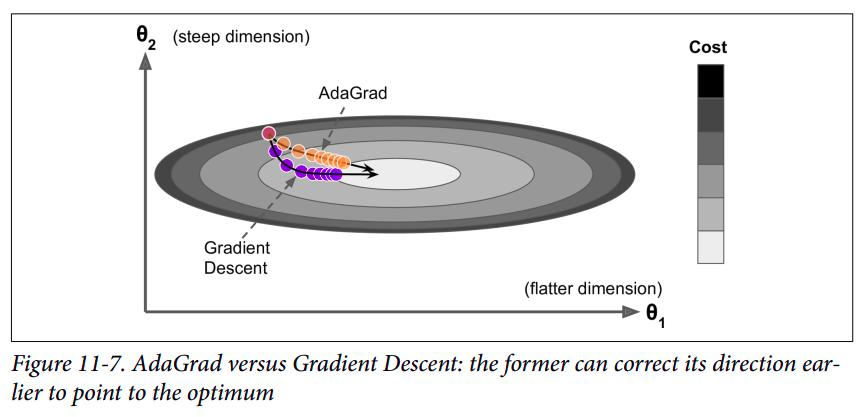


Source: hands-on machine learning with scikit-learn keras and tensorflow - aurélien géron


Scaling the gradient vector helps adjust the path, making it move more efficiently towards the global minimum.

So AdaGrad simply helps us take more precise steps (especially in the long-run).

Armed with intuition, we can now dive into the **mathematics** behind AdaGrad.

The goal is to scale the gradient vector along its **steepest dimensions**, let us keep a scaling term $g_{t}$ for the time $t$.

Let's define $g_{t}$ as the sum of squared gradients up to the time $t$, we'll see why this helps us shortly.

by defenition, $g_{t}$ is a recursive function written as:

$g_{0} = 0$

$g_{t+1} = g_{t} + \nabla_{\theta}J(\theta_t)	\otimes \nabla_{\theta}J(\theta_t)$

Let us define the update rule as:

$\theta_{t+1} = \theta_t - \alpha \cdot \nabla_{\theta}J(\theta_t) \oslash \sqrt{g_{t} + \epsilon} $

<br>
<br>

Note that $\otimes$ and $\oslash$ are element-wise multiplication and division.

This might look a bit intimidating but there is no need to worry, this is just the vanilla update rule with a **dynamic learning rate**:

$\text{learning rate}_{t, i}  = \frac{\alpha}{\sqrt{g_{t, i} + \epsilon}} \implies \theta_{t+1, i} = \theta_{t,i} - \text{learning rate}_{t,i} \cdot \nabla_{\theta}J(\theta_{t,i})$

Where:
- $\text{learning rate}_{t, i}$ is the learning rate of the $i$'th parameter in time $t$.
- $g_{i, t}$ is the value of $g_t$ for the $i$'th parameter.
- $\theta_{t, i}$ is the $i$'th parameter at time $t$.

So there's nothing new except for the dynamic learning rate.

Let us stop using big words and focus on what $\frac{1}{\sqrt{g_{t, i} + \epsilon}}$ actually is:

- The $\epsilon$ term:
 - This just exists in order to ensure that no division by zero occures, it can be a constant set to some small value like $10^{-9}$.

- The $\sqrt{g_{t, i}}$ term:
  - Why is $g_{t,i}$ defined as sum of the squares?\
   because partial derivatives can be **negative**, the goal is to **scale** the vector. In scaling, the only thing that matters is the **magnitude** of the numbers and not their sign so we square them and take their root in order to "scale" them.
  - What does multiplying by $\frac{1}{\sqrt{g_{t, i}}}$ do?\
   This exactly is the process of nomilizing a vector: $\text{Normalized}(\mathbf{v}) = \frac{\mathbf{v}}{\|\mathbf{v}\|}$ which is dividing a vector by it's magnitude, we are essentialy doing this with a small twist.
  - But $\sqrt{g_{t, i}}$ isn't the magnitude of $\nabla_{\theta}J(\theta_{t, i})$, is it?\
   **No it is not.** And it should **never** be. Remember that we wanted to **adjust** the direction of the gradient, not normilize it.
  - So what really happens with $g_{t, i}$?\
   Imagine a loss function in a two-dimensional space. In this space, the gradient of the loss function increases very **weakly in one direction** and very **strongly in the other direction**. If we now sum up the gradients along the axis in which the gradients increase weakly, the squared sum of these gradients becomes even smaller. \
   If during the update step we divide the current gradient $\nabla_{\theta}J(\theta_{t, i})$ by a very small sum of the magnitudes of the gradients $\sqrt{g_{t, i}}$, the quotient becomes very high.\
   For the other axis, along which the gradients increase sharply, exactly the opposite is true.

This is how the AdaGrad algorithm scales the gradient vector along the steepest dimensions.
  

## **C:RMSprop**

There's a small problem with AdaGrad, it behaves like a time-bomb, since $g$ is the some of squares, it is an **increasing function** so $\frac{1}{\sqrt{g_t}}$ keeps getting smaller and smaller.

This causes the problem of **decaying learning rate**. As the learning rate for each parameter keeps decreasing the learning rate might become extremely small, approaching zero, especially for frequently occurring parameters with large gradients.

This is why I'm using the example of a time-bomb, if the convergence doesn't happen within a certain number of steps, it might never happen.

**So how does one fix this?** This problem arises because $g$ is an **increasing function**, so one simply needs to make $g$ **non-increasing**.

The **RMSprop** algorithm fixes this issue by accumulating
only the gradients from **the most recent iterations** (as opposed to all the gradients since the beginning of training). \
This makes $g$ a non-increasing function.


To be exact, RMSprop keeps **lowering the coefficients** of gradients from **older iterations**, which leads to them practically having **less influence** on the parameter updates compared to more **recent gradients**.

With this intuition, it's easy to reconstruct the update rule on our own:

Everything should be the same as AdaGrad except for $g_{t}$. \
$g_t$ should be designed to lower the coefficients of gradients from older iterations.

So let us use something akin to a power series:

$g_{0} = 0$\
$g_{t+1} = \beta g_{t} + (1-\beta)\nabla_{\theta}J(\theta_t)	\otimes \nabla_{\theta}J(\theta_t)$

Where $\beta$ is a hyperparameter called the **decay rate**.\
This is nothing special, by assigning weights to the previously accumulated $g_t$, we are **reducing the influence of older gradients** on the total sum.

The update rule is exactly the same as that of the AdaGrad:

$\theta_{t+1} = \theta_t - \alpha \cdot \nabla_{\theta}J(\theta_t) \oslash \sqrt{g_{t} + \epsilon} $


# Task 2: Comparison of the optimizers

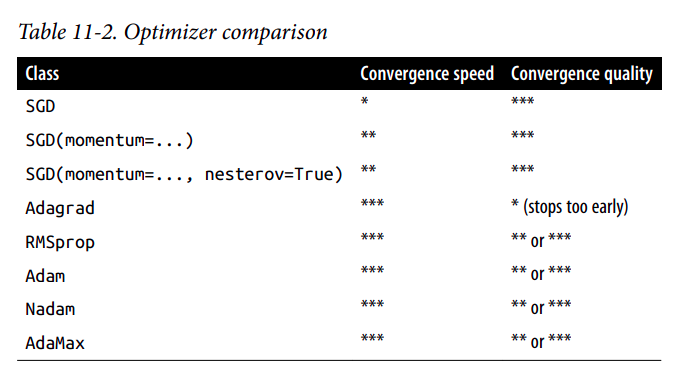\
Source: hands-on machine learning with scikit-learn keras and tensorflow - aurélien géron


## RMSprop vs AdaGrad


RMSprop is basically the improved version of AdaGrad since it's not vulnarable to the problem of the **decaying learning rate**.

![adagrad vs rmsprop](https://miro.medium.com/v2/resize:fit:640/format:webp/1*_4zyVpZazh4OSIzprmYQEw.gif)\
Source: TowardsDataScience

*RMSProp (green) vs AdaGrad (white). The first run just shows the balls; the second run also shows the sum of gradient squared represented by the squares.*

The difference between the algorithms becomes evident in this example, highlighting RMSprop's superiority over AdaGrad.

## RMSprop vs SGD+momentum

![all methods](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*47skUygd3tWf3yB9A10QHg.gif)\
Source: TowardsDataScience

*Animation of 5 gradient descent methods on a surface: gradient descent (cyan), momentum (magenta), AdaGrad (white), RMSProp (green), Adam (blue). Left well is the global minimum; right well is a local minimum.*

In this animation, we can see that GD and GD+momentum get trapped in a **local minima**. Although AdaGrad eventually converges, it takes much longer than RMSprop to do so, this is due to the **decaying learning rate** that we've mentioned before.

A paper by Dami Choi suggests that:

If two optimizers have an **inclusion relationship**, the more
general optimizer **can never be worse** with respect to **any**
metric of interest, provided the hyperparameters are sufficiently tuned to optimize that metric.

This paper also states that: \
$\text{SGD} \subseteq \text{Momentum} ⊆ \text{RMSprop}$

Based on this, RMSprop never underperforms SGD + momentum and thus should be the preffered optimizer in most cases.

Of course, this is not enough evidence to conclude that RMSprop is a better choice than SGD+momentum, we need to know about the advantages and disadvantages of each method which we've glossed over in task 1.

# Task 3: SMOTE

## **Intuition:**

Imagine you're teaching a toddler how to be a librarian, **sorting** books by their **genres**. You have plenty of books, but there's **a shortage of science and history books** on your shelves.\
This could pose a problem because the toddler might not gain enough experience with these genres, leading to a **bias** towards the **more common genres**.

You think long and hard and devise some plans:

- **Remove** some of the more common books until there are an equal number of each genre:\
This is not a good solution because a lot of books get lost.

- **Copy** some of the books from the less common genres until there are an equal number of each genre:\
This, also is not a good method since the child might learn to associate unrelated features to these genres (overfitting).

- **Write** more books from the less common genres until there are an equal number of each genre: \
This method seems to be a better one from the former methods.

But writing a whole book is time-consuming and next to impossible, so how do we keep producing more books without much effort?

Maybe we could start mixing books with each other? but which books do we mix?

Books that sound close to each other for example mixing the books "How to make pasta dough" and "The guide to pesto" should give us something along the lines of "How to make pesto pasta" which sounds fine.

On the other hand, mixing books that don't really sound close to each other (even if they are in the same category) might give us some chaotic results, like how mixing "How to make chicken stew" with "How to make pizza" might result in "How to make pizza stew".

##**Mathematics:**

We came up with three approaches, two of them had major drawbacks:
- Under-sampling the majority points: This will cause loss of data
- Over-sampling the minority points by duplication: This might cause overfitting
- Over-sampling the minority poinys by adding synthetic samples

But how do we proceed with this Over-sampling?

Points that belong to the same category optimally have a convex hull, which forms a closed shape with no indentations. This shape shouldn't undergo a lot of changes after our synthetic samples are added. Thus it's a good idea to pick some points which are already inside this convex hull.

SMOTE tries to achive this by:

- 1) Finding the k (usually 5) nearest point to each point
- 2) Suppose you need to add 100% more points to your genre: randomly choose one of the k nearest points for each point in your genre
- 3) Let $v$ be a point in your genre, let $u$ be the point chosen for $v$
- 4) Compute the difference between $u$ and $v$ and multiply it by a random number between 0 and 1. This gives us a synthetic example along the line between the two points

![oversampling](https://cdn.sanity.io/images/kuana2sp/production-main/06b81a991fe03f9b1090d93bd9132780957d9f6d-1019x1024.png?w=1080&fit=max&auto=format) \
Source: Domino.ai

This method helps us add more points without changing the convex hull too much.

With this method, we can have a more balanced dataset and thus it tackles the problems regarding **bias** and **overfitting**.

![Smote](https://cdn.sanity.io/images/kuana2sp/production-main/1d89e695a1e00a530184f721c0d556b64fa6e66f-1024x468.png?w=1080&fit=max&auto=format) \
Source: Domino.ai

## **Example:**

I'll be using the iris dataset which is used for training classification models, this dataset contains information on 3 different species of iris.


### The first step is to import the dataset and read it

In [ ]:
import numpy as np #we need arrays and stuff
import matplotlib.pyplot as plt #used to draw plots
from sklearn.datasets import load_iris #our dataset
from sklearn.model_selection import train_test_split #to split our dataset into test and train
import tensorflow as tf #for training the model
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()


X = iris.data  # Features
y = iris.target  # Targets

print("Feature names:", iris.feature_names)

print("Target names:", iris.target_names)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


### Let's count the occurances of each label and plot them

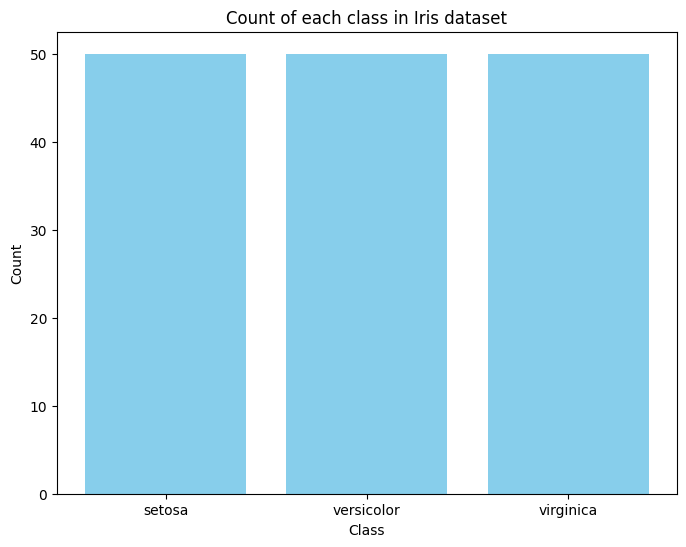

Class 0: 50 samples
Class 1: 50 samples
Class 2: 50 samples


In [ ]:
# Count the occurrences of each class label
class_counts = np.bincount(y)

# Plot the count of each class
plt.figure(figsize=(8, 6))
plt.bar(range(len(class_counts)), class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each class in Iris dataset')
plt.xticks(range(len(class_counts)), iris.target_names)
plt.show()

# Print the class counts
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} samples")

### Let's just visualize the first two features

There are 4 features for each point in our dataset so we are dealing with a 4D space.

Since I can't plot 4D points, I have to do some sort of dimensionality reduction. I'll take the most naive route and skip showing the two last features.

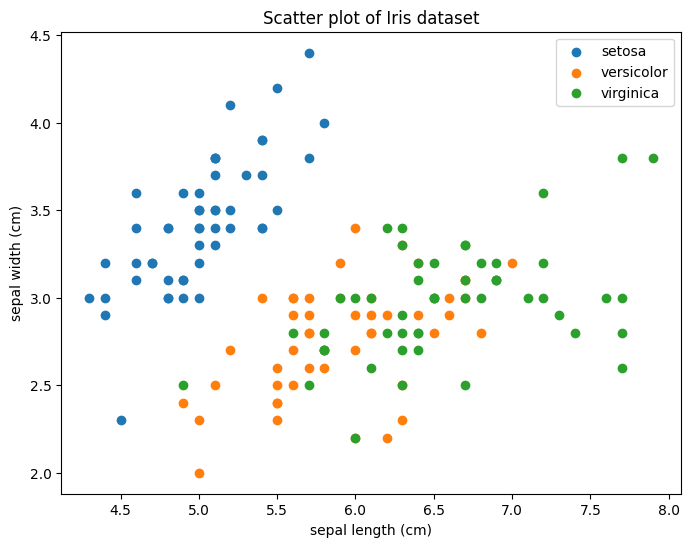

In [ ]:
# Plot the points (only first 2 features)
plt.figure(figsize=(8, 6))

for i in range(len(iris.target_names)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=iris.target_names[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter plot of Iris dataset')
plt.legend()
plt.show()


### Let's make a minority class by eliminating some data-points (from the first class)

I'm just picking 15 random points from the second class

In [ ]:
first_class = X[y == 0]

# Choose random indices for the batch
random_indices = np.random.choice(len(first_class), size=15, replace=False)

# Select the data points corresponding to the random indices
minority_class = first_class[random_indices]

### Let's plot our points

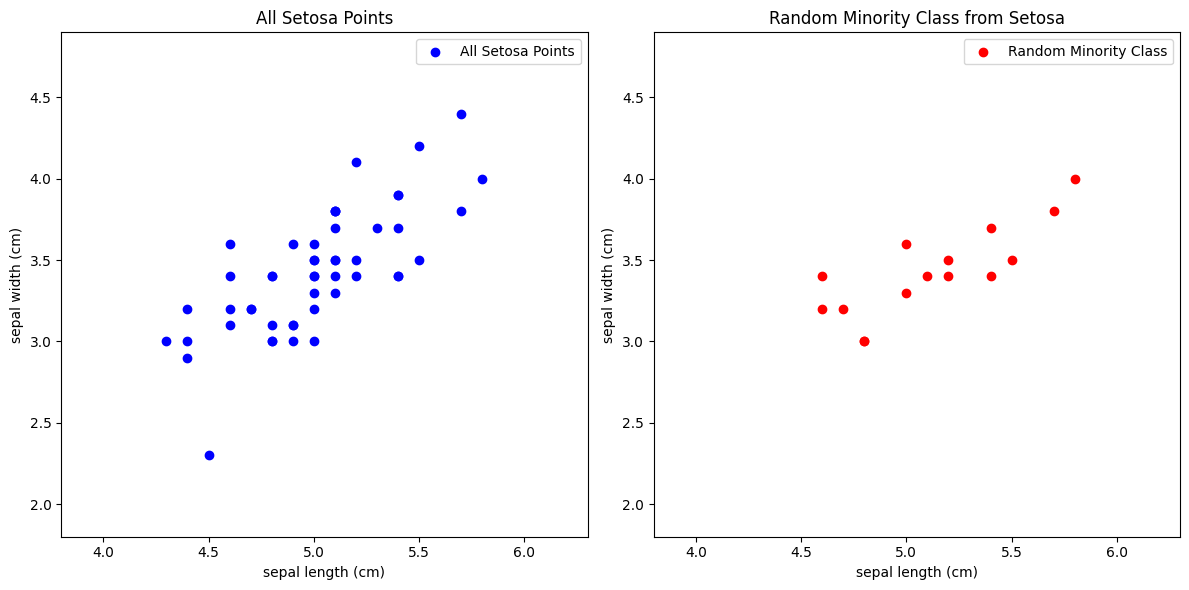

In [ ]:
# Calculate the limits for the axes
x_min = np.min(first_class[:, 0])-0.5
x_max = np.max(first_class[:, 0])+0.5
y_min = np.min(first_class[:, 1])-0.5
y_max = np.max(first_class[:, 1])+0.5

# Plot the selected data points
plt.figure(figsize=(12, 6))

# Plot the scatter plot of all Setosa points
plt.subplot(1, 2, 1)
plt.scatter(first_class[:, 0], first_class[:, 1], label='All Setosa Points', color='blue')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('All Setosa Points')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

# Plot the scatter plot of the random minority class points
plt.subplot(1, 2, 2)
plt.scatter(minority_class[:, 0], minority_class[:, 1], label='Random Minority Class', color='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Minority Class from Setosa')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

plt.tight_layout()
plt.show()

### Applying SMOTE

In [ ]:
def euclidean_distance(p1, p2):
    """Calculate the Euclidean distance between two points."""
    return np.linalg.norm(p1 - p2)

def find_k_nearest_neighbors(data_point, data, k_neighbors):
    """Find the k nearest neighbors of a data point within the same class."""
    distances = [euclidean_distance(data_point, x) for x in data]
    sorted_indices = np.argsort(distances)
    return sorted_indices[1:k_neighbors+1]  # Exclude the data point itself

def randomly_select_neighbors(neighbors, chosen_neighbors_count):
    """Randomly select one of the neighbors."""
    return np.random.choice(neighbors, size=3, replace=False)

def generate_synthetic_sample(data_point, neighbor):
    """Generate a synthetic sample by linear interpolation."""
    weight = np.random.random()  # Random weight between 0 and 1
    return data_point + weight * (neighbor - data_point)

def SMOTE(minority_class, k, chosen_neighbors_count):
    """Generate synthetic samples for the minority class using SMOTE."""
    synthetic_samples = []
    for data_point in minority_class:
        neighbors = find_k_nearest_neighbors(data_point, minority_class, k)
        random_neighbors_index = randomly_select_neighbors(neighbors, 2)
        for random_neighbor_index in random_neighbors_index:
          random_neighbor = minority_class[random_neighbor_index]
          synthetic_sample = generate_synthetic_sample(data_point, random_neighbor)
          synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)


In [ ]:
synthetic_samples = SMOTE(minority_class, 5, 2);

### Let's visualize our synthetic samples

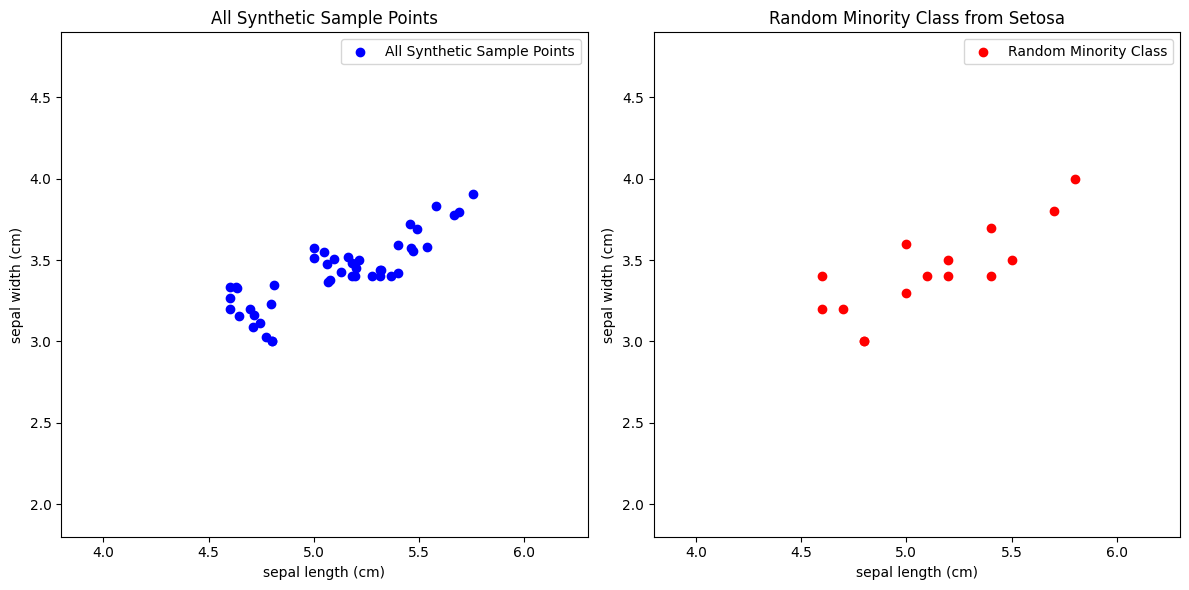

In [ ]:
# Calculate the limits for the axes
x_min = np.min(first_class[:, 0])-0.5
x_max = np.max(first_class[:, 0])+0.5
y_min = np.min(first_class[:, 1])-0.5
y_max = np.max(first_class[:, 1])+0.5

# Plot the selected data points
plt.figure(figsize=(12, 6))

# Plot the scatter plot of all Synthetic points
plt.subplot(1, 2, 1)
plt.scatter(synthetic_samples[:, 0], synthetic_samples[:, 1], label='All Synthetic Sample Points', color='blue')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('All Synthetic Sample Points')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

# Plot the scatter plot of the random minority class points
plt.subplot(1, 2, 2)
plt.scatter(minority_class[:, 0], minority_class[:, 1], label='Random Minority Class', color='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Minority Class from Setosa')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

plt.tight_layout()
plt.show()

### Comparing the over-sampled results with the original minority class

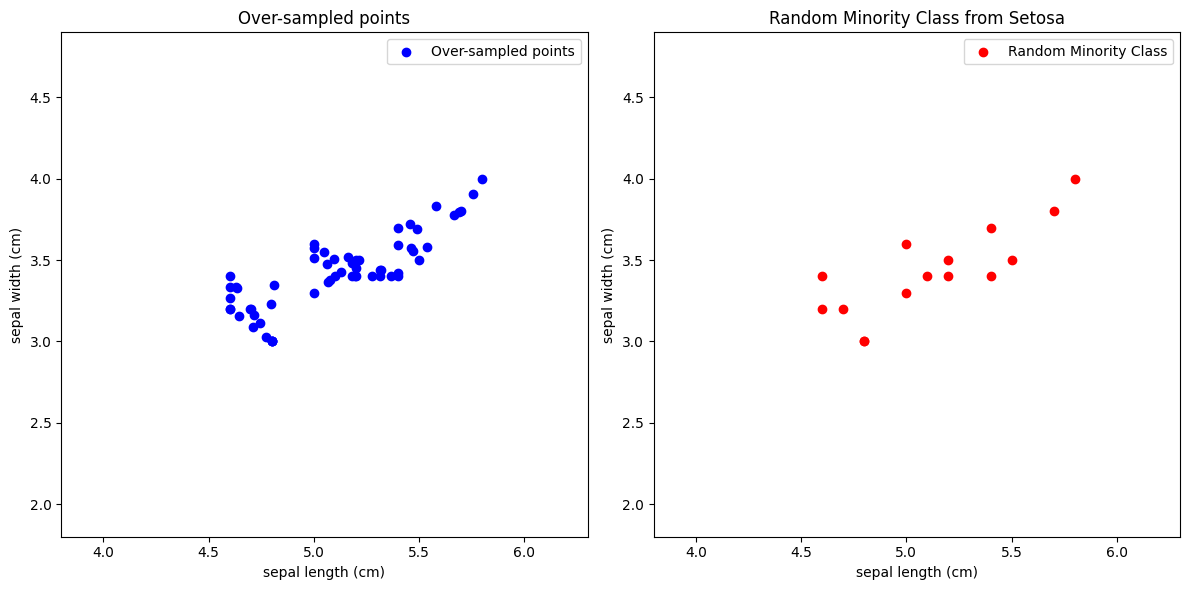

In [ ]:
over_sampled_results = np.concatenate((minority_class, synthetic_samples))

# Calculate the limits for the axes
x_min = np.min(first_class[:, 0])-0.5
x_max = np.max(first_class[:, 0])+0.5
y_min = np.min(first_class[:, 1])-0.5
y_max = np.max(first_class[:, 1])+0.5

# Plot the selected data points
plt.figure(figsize=(12, 6))

# Plot the scatter plot of all the over-sampled points
plt.subplot(1, 2, 1)
plt.scatter(over_sampled_results[:, 0], over_sampled_results[:, 1], label='Over-sampled points', color='blue')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Over-sampled points')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

# Plot the scatter plot of the random minority class points
plt.subplot(1, 2, 2)
plt.scatter(minority_class[:, 0], minority_class[:, 1], label='Random Minority Class', color='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Minority Class from Setosa')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

plt.tight_layout()
plt.show()

## Training a model to evaluate the effect of SMOTE:

Let's start by training a model using the dataset without SMOTE:




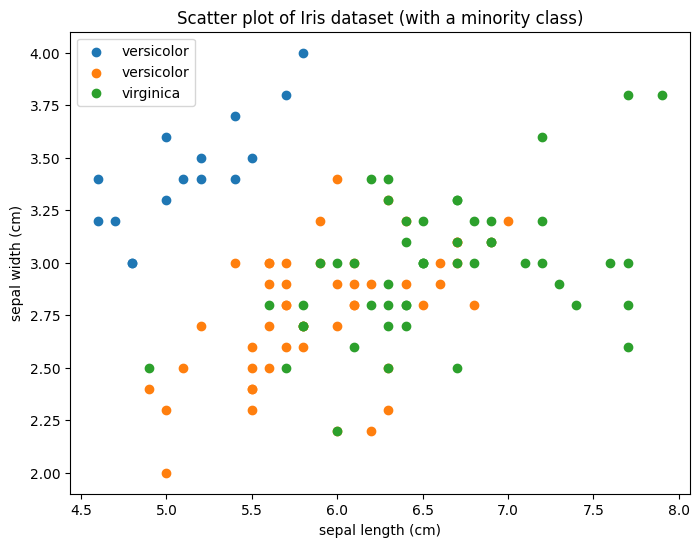

In [ ]:
# Plot the points (only first 2 features)
plt.figure(figsize=(8, 6))

plt.scatter(minority_class[:, 0], minority_class[:, 1], label=iris.target_names[1])
plt.scatter(X[y == 1, 0], X[y == 1, 1], label=iris.target_names[1])
plt.scatter(X[y == 2, 0], X[y == 2, 1], label=iris.target_names[2])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter plot of Iris dataset (with a minority class)')
plt.legend()
plt.show()

###  Creating the dataset

In [ ]:
class1_points = random_indices
class2_points = np.where(y == 1)[0]
class3_points = np.where(y == 2)[0]

selected_indices = np.concatenate((class1_points, class2_points, class3_points))

X_data = X[selected_indices]
y_data = y[selected_indices]

### Splitting the dataset into train and test data (80% train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

### Creating our model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # Input layer with 4 features
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units (one for each class) and softmax activation
])

### Compiling our model

note that since I'm doing a multi-class classification, I have to use a loss function like sparse categorical crossentropy loss.

In [ ]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Evaluation metric

### Training and evaluation

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_labels)
print(report)

1/1 [==============================] - 0s 48ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.75      0.86        12
           2       0.70      1.00      0.82         7

    accuracy                           0.87        23
   macro avg       0.90      0.92      0.89        23
weighted avg       0.91      0.87      0.87        23



### Using the synthetic samples along with the minority class (SMOTE)

In [ ]:
class1_points = over_sampled_results
class2_points = np.where(y == 1)[0]
class3_points = np.where(y == 2)[0]

selected_indices = np.concatenate((class2_points, class3_points))

X_data = np.concatenate((class1_points, X[selected_indices]))
y_data = np.concatenate((np.zeros(len(over_sampled_results)), y[selected_indices]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # Input layer with 4 features
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units (one for each class) and softmax activation
])

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Evaluation metric

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_labels)
print(report)

1/1 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Result

As expected, using SMOTE to balance the class distribution improved the model's performance, resulting in more accurate predictions overall.

# Task 4: Building a classification model

## Part 1: Loading the dataset

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

%cd drive/MyDrive

df = pd.read_csv('Assignment1-Dataset.csv')
df = df.drop(columns=['Unnamed: 93', 'Unnamed: 94'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
# Prepare the data
X = df.drop('Target', axis=1)
y = df['Target']

## Part 2: Checking for missing values

In [ ]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
F1        0
F2        0
F3        0
F4        0
F5        0
         ..
F89       0
F90       0
F91       0
F92       0
Target    0
Length: 93, dtype: int64


## Part 3: Plotting the count of each category

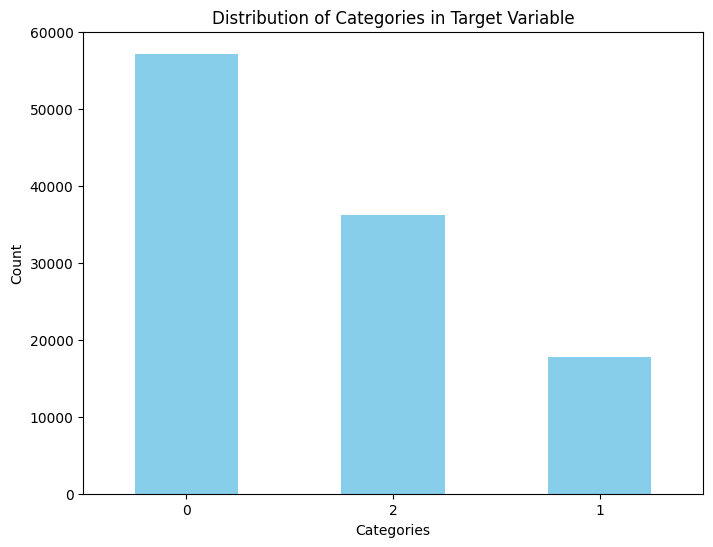

0: 57213
2: 36250
1: 17841


In [ ]:
import matplotlib.pyplot as plt

target_counts = df['Target'].value_counts()

# Plotting the distribution of categories in the target variable
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories in Target Variable')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

for category, count in target_counts.items():
    print(f"{category}: {count}")

We can see that our dataset is unbalanced so we should apply SMOTE.

## Part 4: Training a model without SMOTE

### Importing the necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Splitting the dataset

In [ ]:
# Split the data into training and testing sets (80% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Building the DNN

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(92,)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

### Compiling the model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2 , verbose=1)

Epoch 1/50
1114/1114 [==============================] - 25s 20ms/step - loss: 2218824704.0000 - accuracy: 0.4895 - val_loss: 33431.1133 - val_accuracy: 0.5126
Epoch 2/50
1114/1114 [==============================] - 20s 18ms/step - loss: 4417204.5000 - accuracy: 0.5144 - val_loss: 1.0035 - val_accuracy: 0.5127
Epoch 3/50
1114/1114 [==============================] - 18s 17ms/step - loss: 12241957.0000 - accuracy: 0.5136 - val_loss: 19716.2070 - val_accuracy: 0.5126
Epoch 4/50
1114/1114 [==============================] - 19s 17ms/step - loss: 2922460.2500 - accuracy: 0.5146 - val_loss: 9930.6123 - val_accuracy: 0.5126
Epoch 5/50
1114/1114 [==============================] - 11s 10ms/step - loss: 4373755.5000 - accuracy: 0.5144 - val_loss: 1726.6449 - val_accuracy: 0.5126
Epoch 6/50
1114/1114 [==============================] - 11s 10ms/step - loss: 452.7917 - accuracy: 0.5154 - val_loss: 1893.6892 - val_accuracy: 0.5126
Epoch 7/50
1114/1114 [==============================] - 12s 10ms/step -

### Evaluation and report

In [ ]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Get classification report
no_smote_report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

696/696 [==============================] - 4s 6ms/step
Test Accuracy: 0.510893490858452
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68     11373
           1       0.00      0.00      0.00      3552
           2       0.00      0.00      0.00      7336

    accuracy                           0.51     22261
   macro avg       0.17      0.33      0.23     22261
weighted avg       0.26      0.51      0.35     22261



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The warnings show us that our model is biased towards the first class. This is even more reason to use SMOTE.

## Part 5: Applying SMOTE and normalization

**Min-Max Normalization**: Min-max normalization scales the features to a range between 0 and 1. It's defined as:

$X_{\text{norm}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}} $


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
X_normalized_min_max = min_max_scaler.fit_transform(X)


smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_normalized_min_max, y)

### Plotting the result

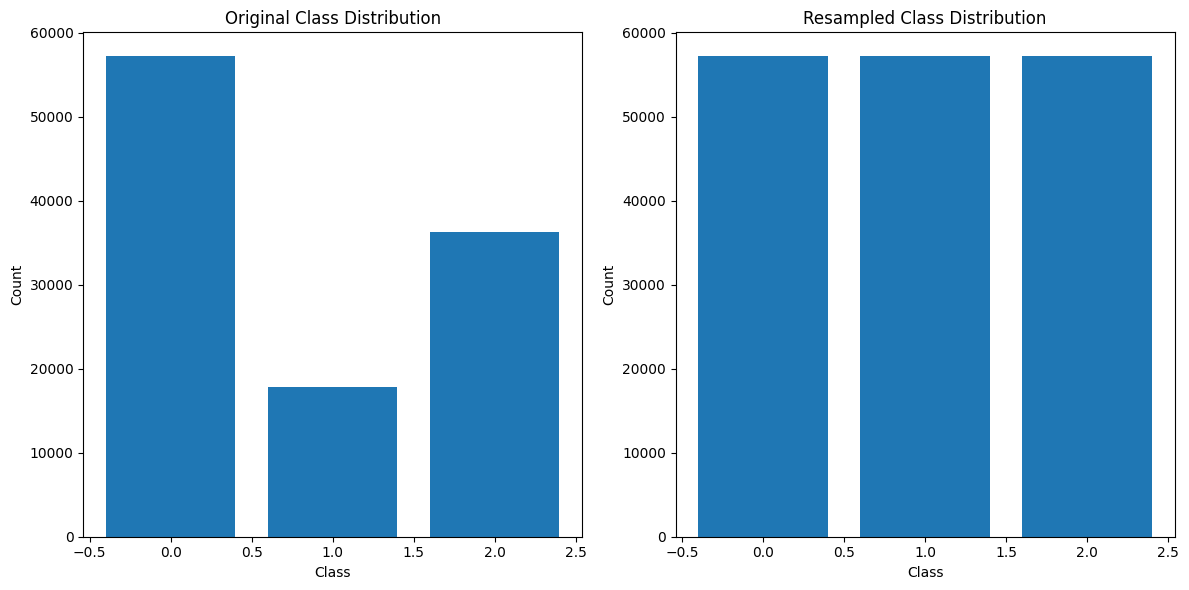

In [ ]:
# Count the occurrences of each class in the original dataset
class_counts_original = y.value_counts()

# Count the occurrences of each class in the resampled dataset
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Plot original class distribution
plt.subplot(1, 2, 1)
plt.bar(class_counts_original.index, class_counts_original.values)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot resampled class distribution
plt.subplot(1, 2, 2)
plt.bar(class_counts_resampled.index, class_counts_resampled.values)
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Part 6: Training a model using RMSprop

In [ ]:
# Split the data into training and testing sets (80% train)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

model = Sequential([
    Dense(128, activation='relu', input_shape=(92,)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
rmsprop_history = model.fit(X_train, y_train, epochs=28, batch_size=64, validation_split=0.2 , verbose=1)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
rmsprop_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", rmsprop_accuracy)

Epoch 1/28
1717/1717 [==============================] - 72s 11ms/step - loss: 0.7139 - accuracy: 0.6604 - val_loss: 0.6882 - val_accuracy: 0.6768
Epoch 2/28
1717/1717 [==============================] - 18s 10ms/step - loss: 0.6700 - accuracy: 0.6824 - val_loss: 0.6614 - val_accuracy: 0.6848
Epoch 3/28
1717/1717 [==============================] - 18s 11ms/step - loss: 0.6567 - accuracy: 0.6886 - val_loss: 0.6553 - val_accuracy: 0.6922
Epoch 4/28
1717/1717 [==============================] - 18s 10ms/step - loss: 0.6464 - accuracy: 0.6973 - val_loss: 0.6562 - val_accuracy: 0.6924
Epoch 5/28
1717/1717 [==============================] - 17s 10ms/step - loss: 0.6377 - accuracy: 0.7032 - val_loss: 0.6610 - val_accuracy: 0.6863
Epoch 6/28
1717/1717 [==============================] - 17s 10ms/step - loss: 0.6302 - accuracy: 0.7087 - val_loss: 0.6420 - val_accuracy: 0.7031
Epoch 7/28
1717/1717 [==============================] - 18s 11ms/step - loss: 0.6248 - accuracy: 0.7110 - val_loss: 0.6287 -

## Part 7: Training a model using AdaGrad

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(92,)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
adagrad_history = model.fit(X_train, y_train, epochs=28, batch_size=64, validation_split=0.2 , verbose=1)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
adagrad_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", adagrad_accuracy)

Epoch 1/28
1717/1717 [==============================] - 17s 10ms/step - loss: 1.0459 - accuracy: 0.5062 - val_loss: 0.9596 - val_accuracy: 0.5599
Epoch 2/28
1717/1717 [==============================] - 15s 9ms/step - loss: 0.8712 - accuracy: 0.5933 - val_loss: 0.8144 - val_accuracy: 0.6181
Epoch 3/28
1717/1717 [==============================] - 16s 9ms/step - loss: 0.7927 - accuracy: 0.6286 - val_loss: 0.7745 - val_accuracy: 0.6354
Epoch 4/28
1717/1717 [==============================] - 17s 10ms/step - loss: 0.7651 - accuracy: 0.6415 - val_loss: 0.7543 - val_accuracy: 0.6448
Epoch 5/28
1717/1717 [==============================] - 16s 9ms/step - loss: 0.7507 - accuracy: 0.6486 - val_loss: 0.7431 - val_accuracy: 0.6489
Epoch 6/28
1717/1717 [==============================] - 16s 10ms/step - loss: 0.7419 - accuracy: 0.6521 - val_loss: 0.7353 - val_accuracy: 0.6556
Epoch 7/28
1717/1717 [==============================] - 14s 8ms/step - loss: 0.7352 - accuracy: 0.6571 - val_loss: 0.7298 - val

## Part 8: Plotting the results (AdaGrad)

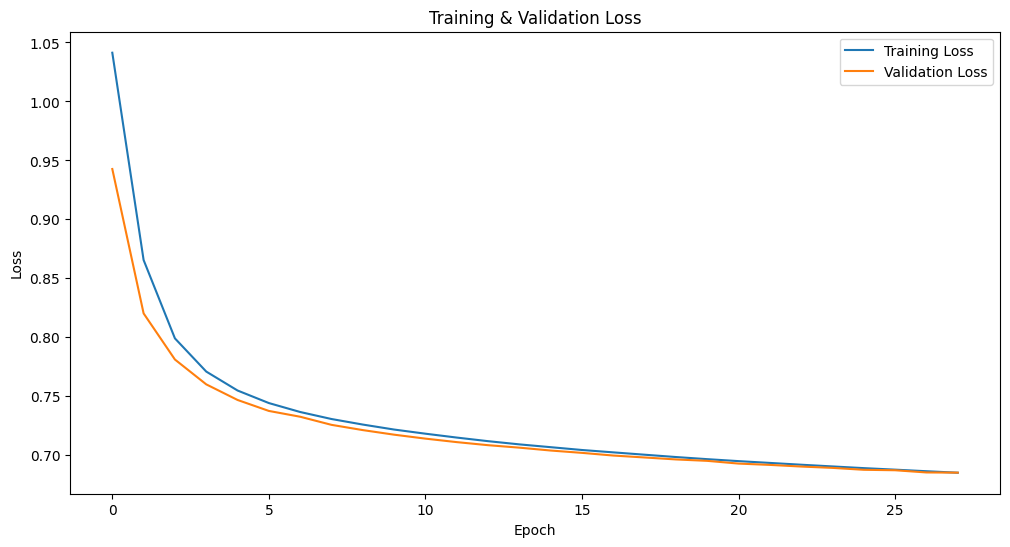

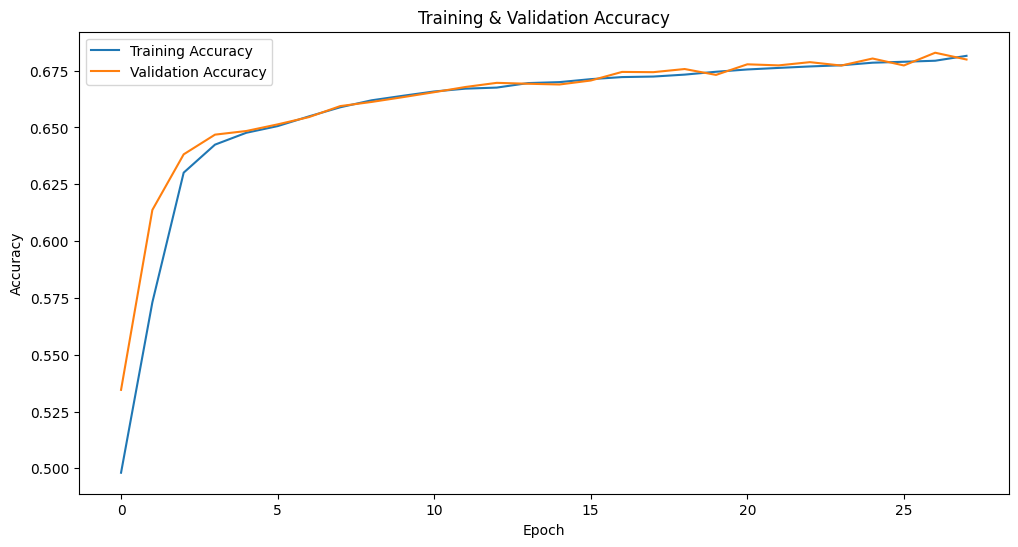

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(adagrad_history.history['loss'], label='Training Loss')
plt.plot(adagrad_history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(adagrad_history.history['accuracy'], label='Training Accuracy')
plt.plot(adagrad_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 9: Plotting the results (RMSprop)

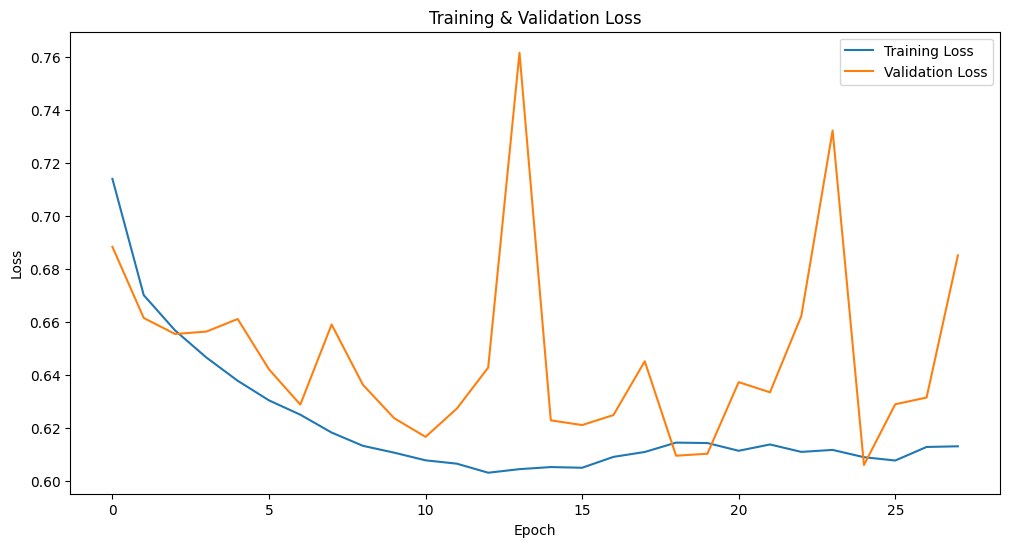

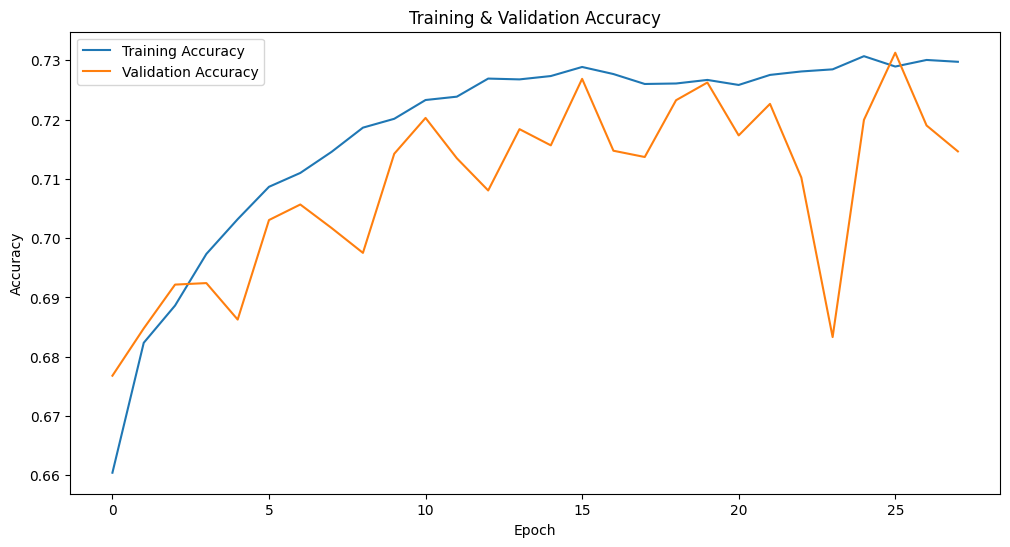

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(rmsprop_history.history['loss'], label='Training Loss')
plt.plot(rmsprop_history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(rmsprop_history.history['accuracy'], label='Training Accuracy')
plt.plot(rmsprop_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Refrences**

[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

[Optimization in Deep Learning: AdaGrad, RMSProp, ADAM](https://artemoppermann.com/optimization-in-deep-learning-adagrad-rmsprop-adam/)

[Understanding convergence of SGD](https://senarvi.github.io/understanding-convergence-of-sgd/)

[A Visual Explanation of Gradient Descent Methods](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)

[On Empirical Comparisons of Optimizers for Deep Learning](https://arxiv.org/pdf/1910.05446.pdf)

[SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf)

[ML internals: Synthetic Minority Oversampling](https://domino.ai/blog/smote-oversampling-technique)

